In [12]:
import pandas as pd
import numpy as np
from glob import glob
import pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
teams = ['Columbia', 'QJHong']

In [5]:
for target_type in ['case', 'death']: 
    dfs = []
    for horizon in [1, 2]:

        target = f'{horizon}-wk-ahead-inc-{target_type}'
        print(target)

        for team in teams:
            print(f'\t{team}')        
            csv_fname = f'../otherTeam/data_processed/combined_{team}_{target}.csv'
            df = pd.read_csv(csv_fname)[['target_end_date', 'value']]\
                .groupby(by='target_end_date').max()\
                .rename(columns={'value': f'{team}_{horizon}'})
            dfs.append(df)

    ours_fname = f'results_time/methodCompare_{target_type}_ours.csv'
    df_ours = pd.read_csv(ours_fname, index_col=0)
    dfs.append(df_ours)

    df_combined = pd.concat(dfs, axis=1, join='outer').round(0)
    df_combined.to_csv(f'results_time/compare_with_otherTeams_{target_type}.csv', float_format='%.0f')

1-wk-ahead-inc-case
	Columbia
	QJHong
2-wk-ahead-inc-case
	Columbia
	QJHong
1-wk-ahead-inc-death
	Columbia
	QJHong
2-wk-ahead-inc-death
	Columbia
	QJHong


/home/yihuang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



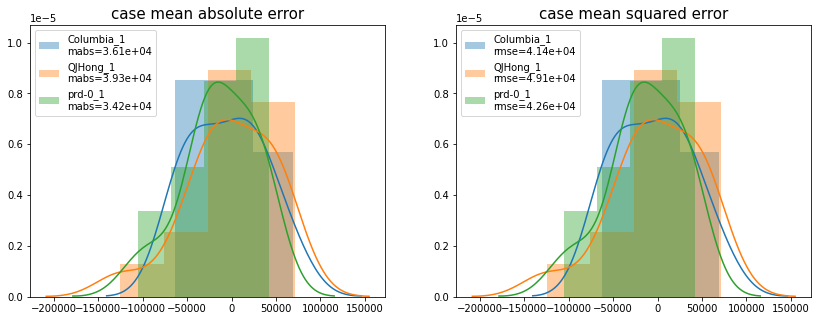

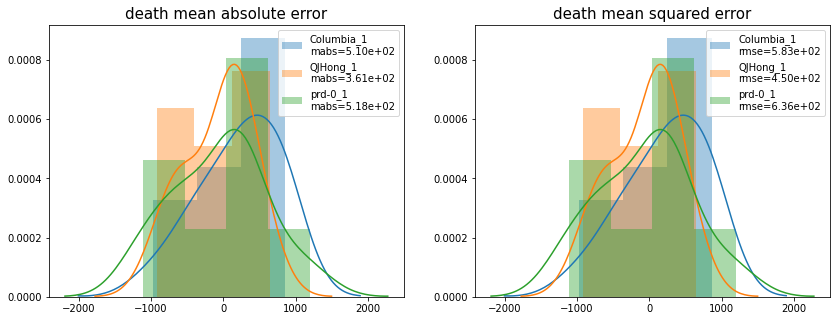

In [33]:
method = 0
for target_type in ['case', 'death']:
    df_combined = pd.read_csv(f'results_time/compare_with_otherTeams_{target_type}.csv', index_col=0)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    cols = ['Columbia_1', 'QJHong_1', f'prd-{method}_1', 'gnd']

    df_tmp = df_combined.dropna()

    for col in cols:
        if col == 'gnd':
            continue
        err = (df_tmp[col] - df_tmp['gnd']).values
        rmse = np.sqrt((err ** 2).mean())
        mabs = np.abs(err).mean()
        sns.distplot(err, ax=axes[0], label=f'{col}\nmabs={mabs:.2e}')
        sns.distplot(err, ax=axes[1], label=f'{col}\nrmse={rmse:.2e}')
        axes[0].legend()
        axes[1].legend()
        axes[0].set_title(f'{target_type} mean absolute error', fontsize=15)
        axes[1].set_title(f'{target_type} mean squared error', fontsize=15)

In [42]:
cols = ['Columbia_1', 'QJHong_1', f'prd-{method}_1']

for target_type in ['case', 'death']:
    
    prd_fname = f'results_time/compare_with_otherTeams_{target_type}.csv'
    err_fname = f'results_time/compare_with_otherTeams_{target_type}_err.csv'
    
    df_combined = pd.read_csv(prd_fname, index_col=0).dropna()
    
    df_err = pd.DataFrame(index=df_combined.index)
    for col in cols:
        df_err[col] = df_combined[col] - df_combined['gnd']
    
    print(df_err)
    df_err.to_csv(err_fname, header=False, index=False, sep=' ', float_format='%.0f')

            Columbia_1  QJHong_1   prd-0_1
2020-07-25     18874.0   71167.0   19417.0
2020-08-01       475.0   48329.0   12387.0
2020-08-08     19995.0   34596.0   35860.0
2020-08-15    -26491.0   -4892.0  -33670.0
2020-08-22     30422.0   43478.0   34688.0
2020-08-29    -17766.0   14551.0  -22596.0
2020-09-05    -14421.0  -18881.0  -11577.0
2020-09-12     58745.0   55053.0   42127.0
2020-09-19    -41168.0  -61503.0  -83647.0
2020-09-26    -53945.0   -3609.0   24386.0
2020-10-03     31480.0   39599.0   -1261.0
2020-10-10     19497.0  -19481.0  -33630.0
2020-10-17    -50934.0  -16205.0  -24981.0
2020-10-24    -61834.0  -26546.0  -35884.0
2020-10-31    -63159.0  -46331.0  -26560.0
2020-11-07     68640.0 -125041.0 -105205.0
            Columbia_1  QJHong_1  prd-0_1
2020-08-01      -972.0    -924.0  -1104.0
2020-08-08       301.0     647.0   1199.0
2020-08-15      -259.0     382.0   -671.0
2020-08-22       403.0      58.0    174.0
2020-08-29       177.0     268.0    179.0
2020-09-05       